In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse

# Loading dataset

In [3]:
#No normalization is required
#Loading isolated pulses (not long traces)
df = pd.read_csv("../PeakDetection_Baseline_IndividualPulses2kV.csv", index_col = 0)
# df2 = pd.read_csv("../PeakDetection_MultiSources_IndividualPulses2kVv2.csv", index_col = 0)
# df = pd.concat([df.T, df2.T], ignore_index = True)
df = df.T

In [4]:
df

0     1     2     3     4     5     6     7     8     9     ...  1490  \
0      135   136   136   136   137   135   137   136   136   136  ...   136   
1      137   136   136   135   138   135   136   136   137   136  ...   136   
2      136   135   135   136   137   135   137   135   136   136  ...   136   
3      137   136   136   136   138   136   136   135   137   136  ...   136   
4      125   130   128   132   134   133   122   102    97   100  ...   136   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5988   136   135   136   135   137   136   137   136   136   136  ...   137   
5989   136   136   136   136   138   136   137   136   136   136  ...   136   
5990   137   136   137   136   138   136   137   136   137   136  ...   136   
5991   125   127   129   132   135   133   135   124   117   119  ...   136   
5992   137   136   136   135   138   136   136   135   136   135  ...   136   

      1491  1492  1493  1494  1495  1496  1497  1498  1499  
0      136   137   136   137   136   137   136   136   136  
1      136   137   136   137   136   136   137   137   136  
2      136   137   136   136   136   137   136   137   136  
3      136   137   136   137   136   137   136   136   136  
4      135   136   136   137   136   137   136   137   136  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5988   136   137   136   136   136   137   135   136   136  
5989   136   137   136   136   136   137   136   136   136  
5990   136   137   136   136   136   136   135   136   136  
5991   136   137   136   137   136   137   136   137   136  
5992   135   137   135   136   136   137   136   137   136  

[5993 rows x 1500 columns]

# Peak detection and valid pulse filtering algorithms

In [5]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

In [6]:
def validPulse(x, initThrs = 5, lookForPeakWindow = 10, windowSize = 200, thrshldRatios = 1.25):

    #Every pulse is valid in the background noise
    return 1
    
    #Check if a high peak pulse is detected at the beginning
    
    partValid = 0
    for i in range(lookForPeakWindow):
        if x[i] > initThrs:
            partValid = 1
#             print("Valid initial peak")
            
    #Is this a decreasing "typical" pulse?
    if partValid:
        initAvg = sum(x[windowSize:]) / windowSize
        endAvg = sum(x[:windowSize]) / windowSize
#         print("Average ratios: " + str(initAvg / endAvg))
        if (initAvg / endAvg) > thrshldRatios:
            return 1
        
    return 0

        

# Filtering only valid typical pulses

### Remove baseline frist

In [7]:
df2 = pd.DataFrame()

In [8]:
for i in range(len(df.T)):
    df2[i] = df.max(axis = 1)[i] - df[i]
df2

0     1     2     3     4     5     6     7     8     9     ...  1490  \
0        3     2     2     2     0     3     1     2     2     1  ...     2   
1        1     2     2     3    -1     3     2     2     1     1  ...     2   
2        2     3     3     2     0     3     1     3     2     1  ...     2   
3        1     2     2     2    -1     2     2     3     1     1  ...     2   
4       13     8    10     6     3     5    16    36    41    37  ...     2   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5988     2     3     2     3     0     2     1     2     2     1  ...     1   
5989     2     2     2     2    -1     2     1     2     2     1  ...     2   
5990     1     2     1     2    -1     2     1     2     1     1  ...     2   
5991    13    11     9     6     2     5     3    14    21    18  ...     2   
5992     1     2     2     3    -1     2     2     3     2     2  ...     2   

      1491  1492  1493  1494  1495  1496  1497  1498  1499  
0        1     1     2     1     1     1     2     2     2  
1        1     1     2     1     1     2     1     1     2  
2        1     1     2     2     1     1     2     1     2  
3        1     1     2     1     1     1     2     2     2  
4        2     2     2     1     1     1     2     1     2  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5988     1     1     2     2     1     1     3     2     2  
5989     1     1     2     2     1     1     2     2     2  
5990     1     1     2     2     1     2     3     2     2  
5991     1     1     2     1     1     1     2     1     2  
5992     2     1     3     2     1     1     2     1     2  

[5993 rows x 1500 columns]

### Apply pulse validation algorithm

In [9]:
df2["ValidPulse"] = df2.apply(validPulse, axis = 1)
df2

0   1   2  3  4  5   6   7   8   9  ...  1491  1492  1493  1494  1495  \
0      3   2   2  2  0  3   1   2   2   1  ...     1     1     2     1     1   
1      1   2   2  3 -1  3   2   2   1   1  ...     1     1     2     1     1   
2      2   3   3  2  0  3   1   3   2   1  ...     1     1     2     2     1   
3      1   2   2  2 -1  2   2   3   1   1  ...     1     1     2     1     1   
4     13   8  10  6  3  5  16  36  41  37  ...     2     2     2     1     1   
...   ..  ..  .. .. .. ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   
5988   2   3   2  3  0  2   1   2   2   1  ...     1     1     2     2     1   
5989   2   2   2  2 -1  2   1   2   2   1  ...     1     1     2     2     1   
5990   1   2   1  2 -1  2   1   2   1   1  ...     1     1     2     2     1   
5991  13  11   9  6  2  5   3  14  21  18  ...     1     1     2     1     1   
5992   1   2   2  3 -1  2   2   3   2   2  ...     2     1     3     2     1   

      1496  1497  1498  1499  ValidPulse  
0        1     2     2     2           1  
1        2     1     1     2           1  
2        1     2     1     2           1  
3        1     2     2     2           1  
4        1     2     1     2           1  
...    ...   ...   ...   ...         ...  
5988     1     3     2     2           1  
5989     1     2     2     2           1  
5990     2     3     2     2           1  
5991     1     2     1     2           1  
5992     1     2     1     2           1  

[5993 rows x 1501 columns]

In [10]:
dfPulses = df2.loc[df2["ValidPulse"] > 0]
dfPulses = dfPulses.drop("ValidPulse", axis = 1)
dfPulses

0     1     2     3     4     5     6     7     8     9     ...  1490  \
0        3     2     2     2     0     3     1     2     2     1  ...     2   
1        1     2     2     3    -1     3     2     2     1     1  ...     2   
2        2     3     3     2     0     3     1     3     2     1  ...     2   
3        1     2     2     2    -1     2     2     3     1     1  ...     2   
4       13     8    10     6     3     5    16    36    41    37  ...     2   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5988     2     3     2     3     0     2     1     2     2     1  ...     1   
5989     2     2     2     2    -1     2     1     2     2     1  ...     2   
5990     1     2     1     2    -1     2     1     2     1     1  ...     2   
5991    13    11     9     6     2     5     3    14    21    18  ...     2   
5992     1     2     2     3    -1     2     2     3     2     2  ...     2   

      1491  1492  1493  1494  1495  1496  1497  1498  1499  
0        1     1     2     1     1     1     2     2     2  
1        1     1     2     1     1     2     1     1     2  
2        1     1     2     2     1     1     2     1     2  
3        1     1     2     1     1     1     2     2     2  
4        2     2     2     1     1     1     2     1     2  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5988     1     1     2     2     1     1     3     2     2  
5989     1     1     2     2     1     1     2     2     2  
5990     1     1     2     2     1     2     3     2     2  
5991     1     1     2     1     1     1     2     1     2  
5992     2     1     3     2     1     1     2     1     2  

[5993 rows x 1500 columns]

# ===== DEBUGGING TEST - DO NOT RUN =======

<IPython.core.display.Javascript object>


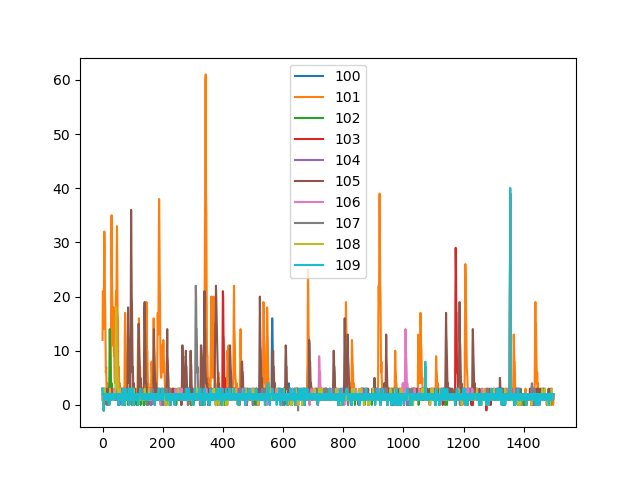

In [52]:
%matplotlib notebook
dfPulses.iloc[100:110,:].T.plot()
plt.show()

In [18]:
import random
randPulse = random.randrange(1000)
randPulse

133

<IPython.core.display.Javascript object>


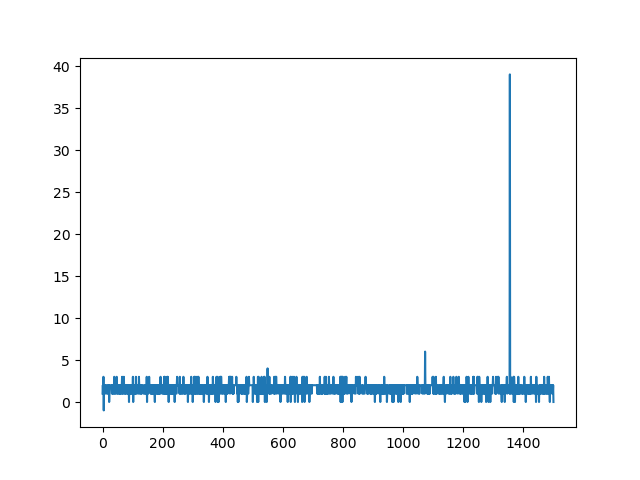

Valid: 0


In [19]:
%matplotlib notebook
sample = df2.iloc[randPulse,:]
sample.plot()
plt.show()
print("Valid: "+ str(validPulse(sample, 5, 10, 200, 1.025)))

# ===== DEBUGGING ENDS HERE :) =======

# Peaks sequence detection

In [11]:
import random
randPulse = random.randrange(len(dfPulses))
randPulse

4982

In [12]:
# Peak time distribution
samplePulse = dfPulses.iloc[randPulse]
samplePulse = samplePulse[:800]
samplePulse["peakLocations"] = pkdetect(samplePulse, 2, 5)
# samplePulse

<IPython.core.display.Javascript object>


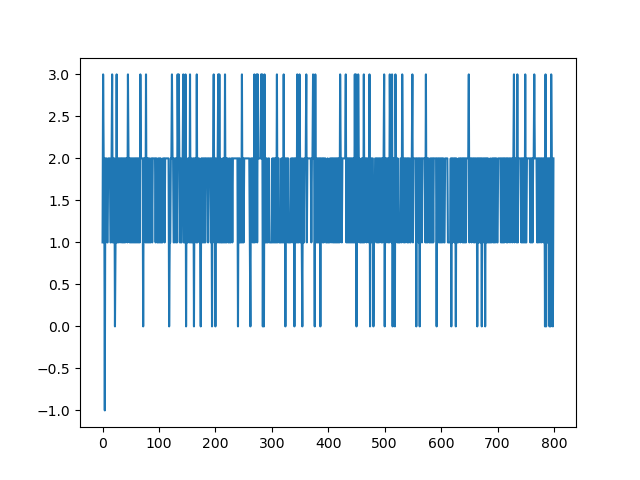

In [13]:
%matplotlib notebook
onlyPulse = samplePulse.iloc[:-1]
peaks = samplePulse.iloc[-1]
ax = onlyPulse.plot()
plt.plot(peaks, onlyPulse[peaks], 'r.')
plt.show()

In [14]:
a = dfPulses.iloc[:100].copy()
a["peakLocations"] = a.apply(pkdetect, args = (5, 5), axis = 1)
b = a.loc[a["peakLocations"].map(len) > 1]
#b[b.columns[:15]]
c = b.loc[:,"peakLocations"]
c

0                                             [57, 112]
1                                           [853, 1355]
2                     [36, 59, 260, 310, 472, 583, 771]
4     [12, 16, 27, 38, 42, 48, 54, 70, 77, 88, 96, 1...
8     [25, 61, 77, 87, 96, 103, 146, 186, 247, 286, ...
9                            [101, 369, 594, 674, 1071]
10                                            [98, 810]
16    [2, 7, 63, 120, 149, 231, 305, 427, 812, 836, ...
19    [25, 62, 155, 368, 441, 506, 565, 747, 856, 1355]
20                  [165, 325, 451, 463, 498, 611, 673]
21                             [49, 246, 266, 729, 905]
22                                           [431, 560]
23                          [365, 712, 915, 1355, 1434]
30    [2, 8, 18, 29, 33, 36, 49, 55, 62, 70, 77, 84,...
31                 [13, 29, 47, 93, 215, 250, 435, 512]
34                      [38, 49, 63, 92, 132, 199, 538]
36                                         [1118, 1168]
37                                             [

In [15]:
#Add peak locations column to each pulse
dfPulses["peakLocations"] = dfPulses[dfPulses.columns[:PMT_PULSE_LENGTH]].apply(pkdetect, args = (2, 5), axis = 1)


#Remove pulses with less than 2 peaks
dfPulses = dfPulses.drop(dfPulses.loc[dfPulses["peakLocations"].map(len) < 2].T, axis = 0)
dfPulses

0   1   2  3  4  5   6   7   8   9  ...  1491  1492  1493  1494  1495  \
0      3   2   2  2  0  3   1   2   2   1  ...     1     1     2     1     1   
1      1   2   2  3 -1  3   2   2   1   1  ...     1     1     2     1     1   
2      2   3   3  2  0  3   1   3   2   1  ...     1     1     2     2     1   
3      1   2   2  2 -1  2   2   3   1   1  ...     1     1     2     1     1   
4     13   8  10  6  3  5  16  36  41  37  ...     2     2     2     1     1   
...   ..  ..  .. .. .. ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   
5988   2   3   2  3  0  2   1   2   2   1  ...     1     1     2     2     1   
5989   2   2   2  2 -1  2   1   2   2   1  ...     1     1     2     2     1   
5990   1   2   1  2 -1  2   1   2   1   1  ...     1     1     2     2     1   
5991  13  11   9  6  2  5   3  14  21  18  ...     1     1     2     1     1   
5992   1   2   2  3 -1  2   2   3   2   2  ...     2     1     3     2     1   

      1496  1497  1498  1499  \
0        1     2     2     2   
1        2     1     1     2   
2        1     2     1     2   
3        1     2     2     2   
4        1     2     1     2   
...    ...   ...   ...   ...   
5988     1     3     2     2   
5989     1     2     2     2   
5990     2     3     2     2   
5991     1     2     1     2   
5992     1     2     1     2   

                                          peakLocations  
0                           [57, 112, 1073, 1152, 1355]  
1                               [853, 1073, 1355, 1376]  
2     [36, 59, 260, 310, 320, 472, 583, 771, 1073, 1...  
3                                          [1073, 1355]  
4     [2, 12, 16, 27, 38, 42, 48, 54, 70, 77, 88, 96...  
...                                                 ...  
5988        [108, 177, 528, 825, 955, 1073, 1355, 1468]  
5989                             [680, 765, 1073, 1355]  
5990                                       [1073, 1355]  
5991         [1, 8, 12, 113, 665, 844, 885, 1073, 1355]  
5992                                 [1073, 1344, 1355]  

[5948 rows x 1501 columns]

### Time between first and Nth peaks

In [16]:
def relativeArrivalTimes(x):
    deltaList = []
    for i in range(len(x) - 1):
        deltaList.append(x[i + 1] - x[0]) #Relative time respect to first peak
    
    return deltaList

### Time between successive peaks

In [17]:
def timeBetweenPeaks(x):
    deltaList = []
    for i in range(len(x) - 1):
        deltaList.append(x[i + 1] - x[i]) #Relative time respect to first peak
    
    return deltaList

In [18]:
dfPulses["arrivalTimes"] = dfPulses["peakLocations"].apply(relativeArrivalTimes)
dfPulses

0   1   2  3  4  5   6   7   8   9  ...  1492  1493  1494  1495  1496  \
0      3   2   2  2  0  3   1   2   2   1  ...     1     2     1     1     1   
1      1   2   2  3 -1  3   2   2   1   1  ...     1     2     1     1     2   
2      2   3   3  2  0  3   1   3   2   1  ...     1     2     2     1     1   
3      1   2   2  2 -1  2   2   3   1   1  ...     1     2     1     1     1   
4     13   8  10  6  3  5  16  36  41  37  ...     2     2     1     1     1   
...   ..  ..  .. .. .. ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   
5988   2   3   2  3  0  2   1   2   2   1  ...     1     2     2     1     1   
5989   2   2   2  2 -1  2   1   2   2   1  ...     1     2     2     1     1   
5990   1   2   1  2 -1  2   1   2   1   1  ...     1     2     2     1     2   
5991  13  11   9  6  2  5   3  14  21  18  ...     1     2     1     1     1   
5992   1   2   2  3 -1  2   2   3   2   2  ...     1     3     2     1     1   

      1497  1498  1499                                      peakLocations  \
0        2     2     2                        [57, 112, 1073, 1152, 1355]   
1        1     1     2                            [853, 1073, 1355, 1376]   
2        2     1     2  [36, 59, 260, 310, 320, 472, 583, 771, 1073, 1...   
3        2     2     2                                       [1073, 1355]   
4        2     1     2  [2, 12, 16, 27, 38, 42, 48, 54, 70, 77, 88, 96...   
...    ...   ...   ...                                                ...   
5988     3     2     2        [108, 177, 528, 825, 955, 1073, 1355, 1468]   
5989     2     2     2                             [680, 765, 1073, 1355]   
5990     3     2     2                                       [1073, 1355]   
5991     2     1     2         [1, 8, 12, 113, 665, 844, 885, 1073, 1355]   
5992     2     1     2                                 [1073, 1344, 1355]   

                                           arrivalTimes  
0                                [55, 1016, 1095, 1298]  
1                                       [220, 502, 523]  
2     [23, 224, 274, 284, 436, 547, 735, 1037, 1223,...  
3                                                 [282]  
4     [10, 14, 25, 36, 40, 46, 52, 68, 75, 86, 94, 1...  
...                                                 ...  
5988               [69, 420, 717, 847, 965, 1247, 1360]  
5989                                     [85, 393, 675]  
5990                                              [282]  
5991            [7, 11, 112, 664, 843, 884, 1072, 1354]  
5992                                         [271, 282]  

[5948 rows x 1502 columns]

In [19]:
dfPulses["timeBetweenPeaks"] = dfPulses["peakLocations"].apply(timeBetweenPeaks)
dfPulses

0   1   2  3  4  5   6   7   8   9  ...  1493  1494  1495  1496  1497  \
0      3   2   2  2  0  3   1   2   2   1  ...     2     1     1     1     2   
1      1   2   2  3 -1  3   2   2   1   1  ...     2     1     1     2     1   
2      2   3   3  2  0  3   1   3   2   1  ...     2     2     1     1     2   
3      1   2   2  2 -1  2   2   3   1   1  ...     2     1     1     1     2   
4     13   8  10  6  3  5  16  36  41  37  ...     2     1     1     1     2   
...   ..  ..  .. .. .. ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   
5988   2   3   2  3  0  2   1   2   2   1  ...     2     2     1     1     3   
5989   2   2   2  2 -1  2   1   2   2   1  ...     2     2     1     1     2   
5990   1   2   1  2 -1  2   1   2   1   1  ...     2     2     1     2     3   
5991  13  11   9  6  2  5   3  14  21  18  ...     2     1     1     1     2   
5992   1   2   2  3 -1  2   2   3   2   2  ...     3     2     1     1     2   

      1498  1499                                      peakLocations  \
0        2     2                        [57, 112, 1073, 1152, 1355]   
1        1     2                            [853, 1073, 1355, 1376]   
2        1     2  [36, 59, 260, 310, 320, 472, 583, 771, 1073, 1...   
3        2     2                                       [1073, 1355]   
4        1     2  [2, 12, 16, 27, 38, 42, 48, 54, 70, 77, 88, 96...   
...    ...   ...                                                ...   
5988     2     2        [108, 177, 528, 825, 955, 1073, 1355, 1468]   
5989     2     2                             [680, 765, 1073, 1355]   
5990     2     2                                       [1073, 1355]   
5991     1     2         [1, 8, 12, 113, 665, 844, 885, 1073, 1355]   
5992     1     2                                 [1073, 1344, 1355]   

                                           arrivalTimes  \
0                                [55, 1016, 1095, 1298]   
1                                       [220, 502, 523]   
2     [23, 224, 274, 284, 436, 547, 735, 1037, 1223,...   
3                                                 [282]   
4     [10, 14, 25, 36, 40, 46, 52, 68, 75, 86, 94, 1...   
...                                                 ...   
5988               [69, 420, 717, 847, 965, 1247, 1360]   
5989                                     [85, 393, 675]   
5990                                              [282]   
5991            [7, 11, 112, 664, 843, 884, 1072, 1354]   
5992                                         [271, 282]   

                                       timeBetweenPeaks  
0                                    [55, 961, 79, 203]  
1                                        [220, 282, 21]  
2        [23, 201, 50, 10, 152, 111, 188, 302, 186, 96]  
3                                                 [282]  
4     [10, 4, 11, 11, 4, 6, 6, 16, 7, 11, 8, 14, 10,...  
...                                                 ...  
5988                 [69, 351, 297, 130, 118, 282, 113]  
5989                                     [85, 308, 282]  
5990                                              [282]  
5991                [7, 4, 101, 552, 179, 41, 188, 282]  
5992                                          [271, 11]  

[5948 rows x 1503 columns]

## Relative time between first and Nth peak

<IPython.core.display.Javascript object>


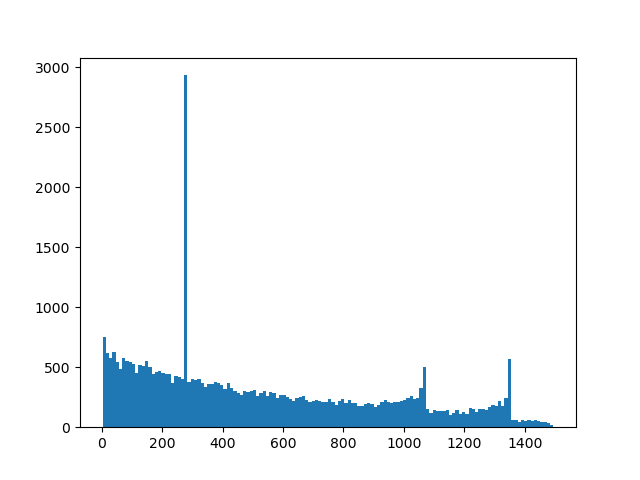

In [278]:
%matplotlib notebook
arrivalTimes = []
for i in dfPulses["arrivalTimes"]:
    arrivalTimes.extend(i)

nBinsFit = int(2*(len(arrivalTimes)**(2/5.0)))
# nBinsFit = 1500
    
histData = plt.hist(arrivalTimes, bins = nBinsFit)
plt.show()


# Peak time interval at sample 282

In [184]:
nBinsFit

138

# Model fitting
## Finding parameters of exponential distribution for relative times from first peak

In [279]:
import numpy as np
from scipy.optimize import curve_fit

def expDist(x, A, lamb):
    x = np.array(x)
    return A*np.exp((-1)*lamb*x)

In [280]:
histX = np.array(histData[1][:-1])
histY = np.array(histData[0])

In [281]:
fittingBoundsAmp = (20, 1500)
fittingBoundsLam = (1e-6, 10.00)

In [282]:
#Using least-squares method
popt, pcov = curve_fit(expDist, histX, histY, bounds = ((fittingBoundsAmp[0], fittingBoundsLam[0]),(fittingBoundsAmp[1], fittingBoundsLam[1])))

distAmp, distLambda = popt

In [283]:
distAmp

644.1892510332838

In [284]:
distLambda

0.001278197667583923

<IPython.core.display.Javascript object>


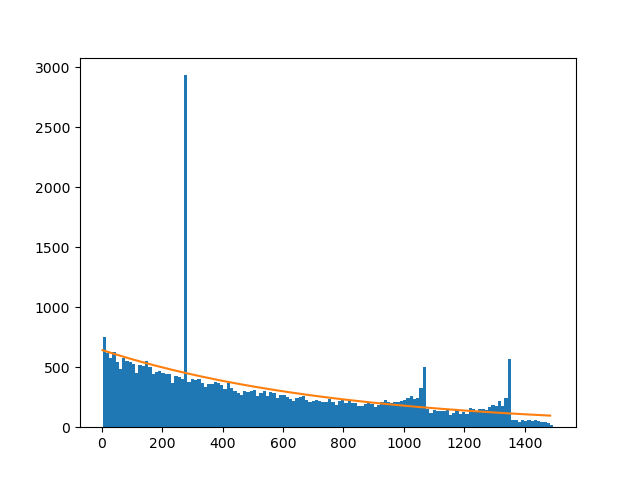

In [285]:
%matplotlib notebook

fitX = histX
fitY = expDist(fitX, distAmp, distLambda)

plt.hist(arrivalTimes, bins = nBinsFit)
plt.plot(fitX, fitY)
plt.show()

## Determining pulse characteristics for those whose time peak interval is located exactly at sample 288

In [46]:
#Function to be called within a APPLY operation from a Pandas DataFrame
#Determines whether a value exists in a list or not

def valueAtList(listX, value):
    return value in listX

In [90]:
dfAreas = pd.read_csv("../PeakDetection_Baseline_Areas2kV_v2.csv", index_col = 0)
dfAreas.index = dfAreas.index.map(str)
dfAreas

Baseline
0         2936
1         2709
2         3653
3         2674
4         9357
...        ...
5988      1587
5989      2880
5990      2811
5991      3147
5992      2880

[5993 rows x 1 columns]

In [91]:
dfPulses = pd.concat([dfPulses, dfAreas], axis = 1).dropna()
dfPulses = dfPulses.rename(columns={"Baseline" : "Area"})
dfPulses

0     1     2    3    4    5     6     7     8     9  ...  1494  \
0      3.0   2.0   2.0  2.0  0.0  3.0   1.0   2.0   2.0   1.0  ...   1.0   
1      1.0   2.0   2.0  3.0 -1.0  3.0   2.0   2.0   1.0   1.0  ...   1.0   
2      2.0   3.0   3.0  2.0  0.0  3.0   1.0   3.0   2.0   1.0  ...   2.0   
3      1.0   2.0   2.0  2.0 -1.0  2.0   2.0   3.0   1.0   1.0  ...   1.0   
4     13.0   8.0  10.0  6.0  3.0  5.0  16.0  36.0  41.0  37.0  ...   1.0   
...    ...   ...   ...  ...  ...  ...   ...   ...   ...   ...  ...   ...   
5988   2.0   3.0   2.0  3.0  0.0  2.0   1.0   2.0   2.0   1.0  ...   2.0   
5989   2.0   2.0   2.0  2.0 -1.0  2.0   1.0   2.0   2.0   1.0  ...   2.0   
5990   1.0   2.0   1.0  2.0 -1.0  2.0   1.0   2.0   1.0   1.0  ...   2.0   
5991  13.0  11.0   9.0  6.0  2.0  5.0   3.0  14.0  21.0  18.0  ...   1.0   
5992   1.0   2.0   2.0  3.0 -1.0  2.0   2.0   3.0   2.0   2.0  ...   2.0   

      1495  1496  1497  1498  1499  \
0      1.0   1.0   2.0   2.0   2.0   
1      1.0   2.0   1.0   1.0   2.0   
2      1.0   1.0   2.0   1.0   2.0   
3      1.0   1.0   2.0   2.0   2.0   
4      1.0   1.0   2.0   1.0   2.0   
...    ...   ...   ...   ...   ...   
5988   1.0   1.0   3.0   2.0   2.0   
5989   1.0   1.0   2.0   2.0   2.0   
5990   1.0   2.0   3.0   2.0   2.0   
5991   1.0   1.0   2.0   1.0   2.0   
5992   1.0   1.0   2.0   1.0   2.0   

                                          peakLocations  \
0                           [57, 112, 1073, 1152, 1355]   
1                               [853, 1073, 1355, 1376]   
2     [36, 59, 260, 310, 320, 472, 583, 771, 1073, 1...   
3                                          [1073, 1355]   
4     [2, 12, 16, 27, 38, 42, 48, 54, 70, 77, 88, 96...   
...                                                 ...   
5988        [108, 177, 528, 825, 955, 1073, 1355, 1468]   
5989                             [680, 765, 1073, 1355]   
5990                                       [1073, 1355]   
5991         [1, 8, 12, 113, 665, 844, 885, 1073, 1355]   
5992                                 [1073, 1344, 1355]   

                                           arrivalTimes  \
0                                [55, 1016, 1095, 1298]   
1                                       [220, 502, 523]   
2     [23, 224, 274, 284, 436, 547, 735, 1037, 1223,...   
3                                                 [282]   
4     [10, 14, 25, 36, 40, 46, 52, 68, 75, 86, 94, 1...   
...                                                 ...   
5988               [69, 420, 717, 847, 965, 1247, 1360]   
5989                                     [85, 393, 675]   
5990                                              [282]   
5991            [7, 11, 112, 664, 843, 884, 1072, 1354]   
5992                                         [271, 282]   

                                       timeBetweenPeaks  Area  
0                                    [55, 961, 79, 203]  2936  
1                                        [220, 282, 21]  2709  
2        [23, 201, 50, 10, 152, 111, 188, 302, 186, 96]  3653  
3                                                 [282]  2674  
4     [10, 4, 11, 11, 4, 6, 6, 16, 7, 11, 8, 14, 10,...  9357  
...                                                 ...   ...  
5988                 [69, 351, 297, 130, 118, 282, 113]  1587  
5989                                     [85, 308, 282]  2880  
5990                                              [282]  2811  
5991                [7, 4, 101, 552, 179, 41, 188, 282]  3147  
5992                                          [271, 11]  2880  

[5948 rows x 1504 columns]

<IPython.core.display.Javascript object>


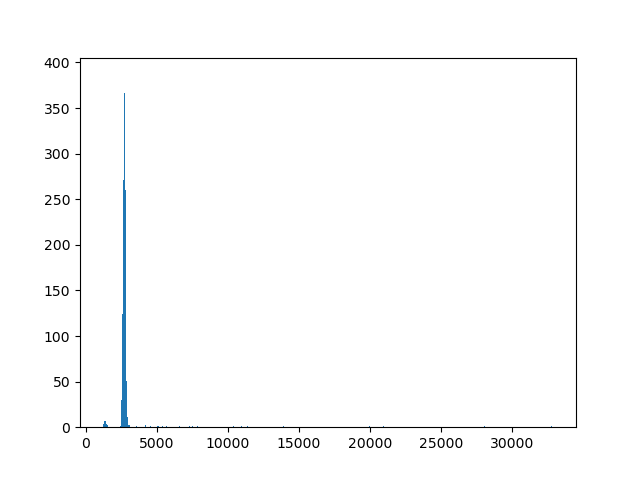

In [103]:
%matplotlib notebook

dfIsolatedWiredPulses = dfPulses[dfPulses["arrivalTimes"].apply(valueAtList, args = [282,])]

plt.hist(dfIsolatedWiredPulses["Area"], bins = 1000)
plt.show()

In [117]:
dfIsolatedWiredPulses["Area"].values

array([2674, 2714, 2713, ..., 2820, 2811, 2880])

<IPython.core.display.Javascript object>


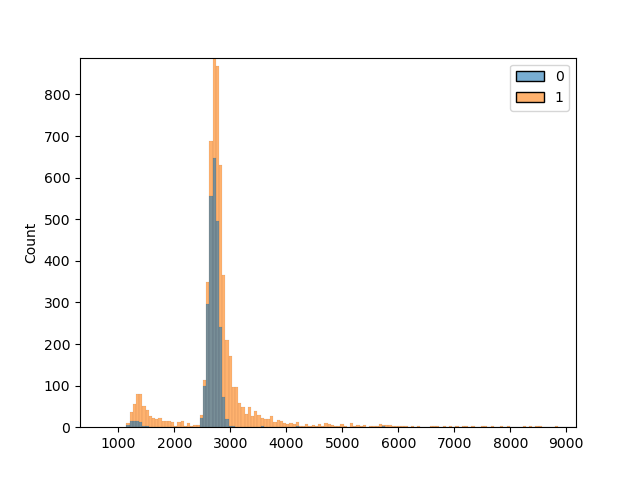

In [120]:
%matplotlib notebook
sns.histplot(data = [dfIsolatedWiredPulses["Area"].values, dfPulses["Area"].values], alpha = 0.6, bins = 1000)
plt.show()

<IPython.core.display.Javascript object>


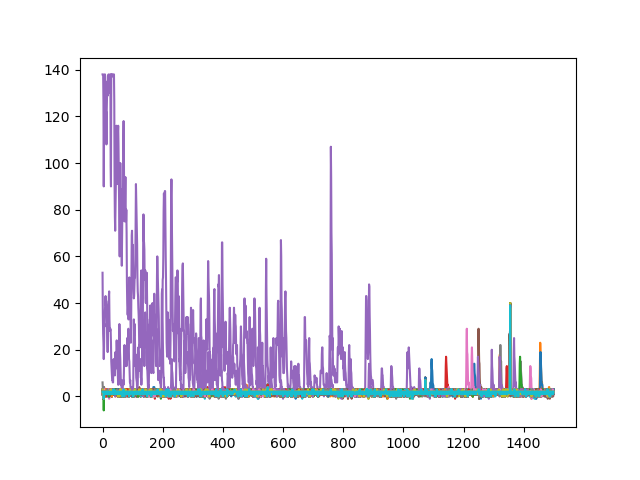

In [147]:
initialIndex = 1000
numOfIndexes = 180


%matplotlib notebook
dfIsolatedWiredPulses.iloc[initialIndex:initialIndex + numOfIndexes,:PMT_PULSE_LENGTH].T.plot(legend=None)
plt.show()

## Finding parameters of exponential distribution for time between succesive peaks (Poisson)

<IPython.core.display.Javascript object>


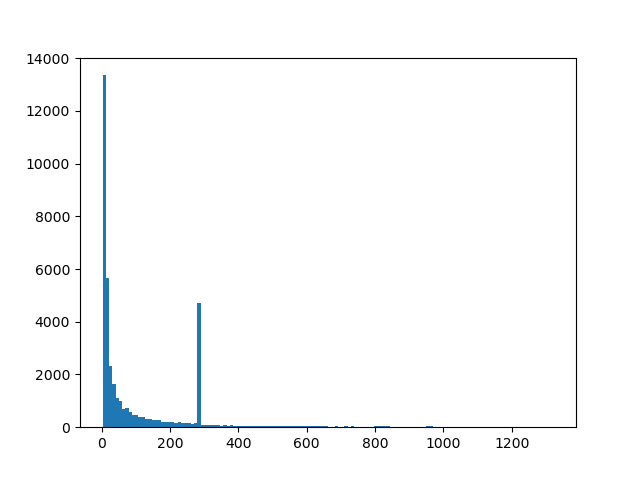

In [252]:
%matplotlib notebook
betweenPulsesTimes = []
for i in dfPulses["timeBetweenPeaks"]:
    betweenPulsesTimes.extend(i)

nBinsPoisson = int(2*(len(betweenPulsesTimes)**(2/5.0)))
# nBinsPoisson = 1000
    
histData = plt.hist(betweenPulsesTimes, bins = nBinsPoisson)
plt.show()

In [253]:
import numpy as np
from scipy.optimize import curve_fit

def expDist(x, A, lamb):
    x = np.array(x)
    return A*np.exp((-1)*lamb*x)

In [254]:
histX = np.array(histData[1][:-1])
histY = np.array(histData[0])

In [255]:
fittingBoundsAmp = (500, 80000)
fittingBoundsLam = (1e-9, 1.00)

In [256]:
#Using least-squares method
popt, pcov = curve_fit(expDist, histX, histY, bounds = ((fittingBoundsAmp[0], fittingBoundsLam[0]),(fittingBoundsAmp[1], fittingBoundsLam[1])))

distAmp, distLambda = popt

In [257]:
distAmp

16868.184824661534

In [258]:
distLambda

0.08218040271044923

<IPython.core.display.Javascript object>


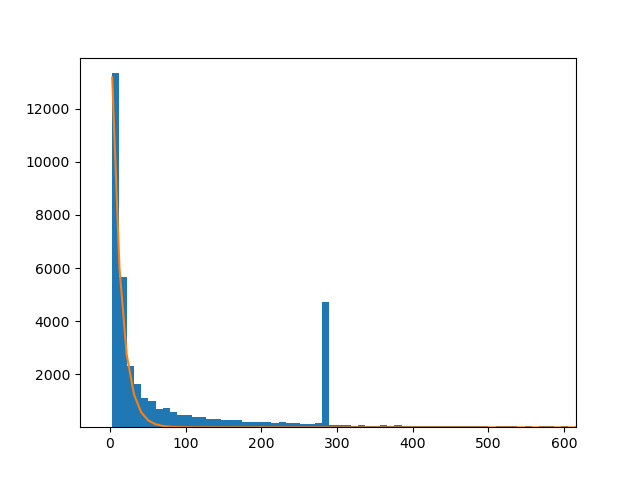

In [259]:
%matplotlib notebook

fitX = histX
fitY = expDist(fitX, distAmp, distLambda)

plt.hist(betweenPulsesTimes, bins = nBinsPoisson)
plt.plot(fitX, fitY)
plt.show()

# Determining pulse waveform of arrivalTimes artifact at sample #282

In [239]:
len(dfPulses)

5948

In [262]:
# regionOfInterest = range(588, 593)
regionOfInterest = range(280, 284)
pulseIndexes = []

#Filtering only "wierd" pulses from the dataset
for i in range(len(dfPulses)):
    for j in dfPulses["timeBetweenPeaks"].iloc[i]:
        if j in regionOfInterest:
            pulseIndexes.append(i)
            break

<IPython.core.display.Javascript object>


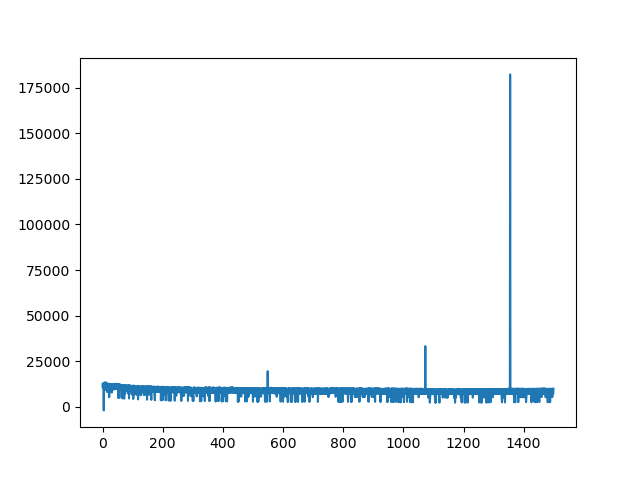

In [263]:
#Summing up "sample by sample" all the pulses contribution

%matplotlib notebook
wierdPulses = dfPulses.iloc[pulseIndexes[:]]
wierdPulses = wierdPulses.sum()
plt.plot(wierdPulses[:PMT_PULSE_LENGTH])
plt.show()

<IPython.core.display.Javascript object>


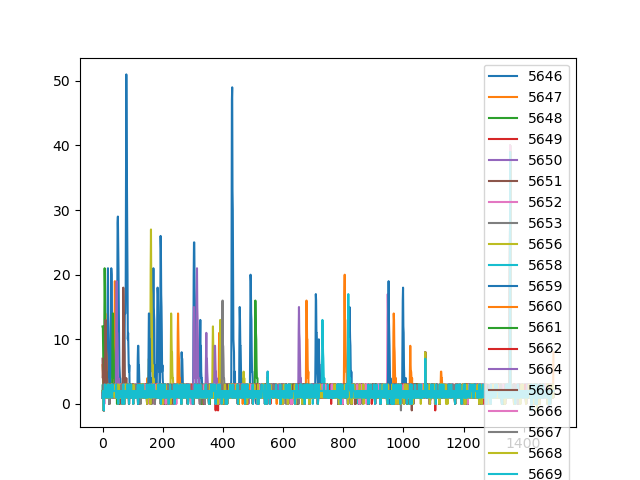

In [276]:
#Examining single pulses

import random

currentPulse = random.randrange(len(pulseIndexes))
pulsesToPlot = 20

%matplotlib notebook
wierdPulses = dfPulses.iloc[pulseIndexes[currentPulse:currentPulse + pulsesToPlot]]

wierdPulses[wierdPulses.columns[:PMT_PULSE_LENGTH]].T.plot()
plt.show()

## Examining single (random) pulses from the original dataset. Looking for abnormality at sample #282

<IPython.core.display.Javascript object>


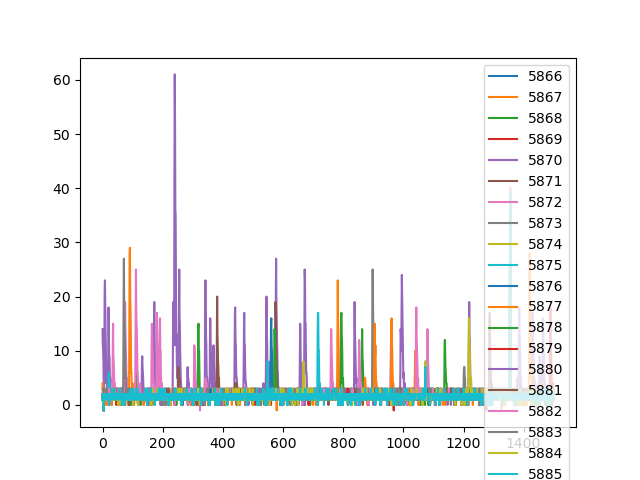

In [266]:
#Comparing with whole dataset (not only wierd puluses)

import random

currentPulse = random.randrange(len(dfPulses))
pulsesToPlot = 20

%matplotlib notebook
dfPulses.iloc[currentPulse:currentPulse + pulsesToPlot][dfPulses.columns[:PMT_PULSE_LENGTH]].T.plot()

plt.show()